In [1]:
%autosave 0
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Autosave disabled


The relational product of two relations $R_1$ and $R_2$ is defined as follows:
$$ R_1 \circ R_2 := 
\Bigl\{ \langle x, z \rangle 
\mid \exists y: \bigl(\langle x, y\rangle \in R_1 \wedge \langle y, z \rangle \in R_2\bigr)
\Bigr\}
$$

In [2]:
def product(R1, R2):
    "Compute the relational product of R1 and R2."
    return { (x, z) for (x, y1) in R1 for (y2, z) in R2 if y1 == y2 }

In [3]:
R1 = { (1, 2), (1, 4) }
R2 = { (2, 3), (2, 5) }
product(R1, R2)

{(1, 3), (1, 5)}

The transitive closure of a binary relation $R \subseteq M \times M$ can be computed by the following fixpoint iteration:
$$ R^+ = R \cup R^+ \circ R $$ 

In [4]:
def transClosure(R):
    "Compute the transitive closure of the binary relation R."
    T = R
    while True:
        oldT = T
        T    = product(T,R).union(R)
        if T == oldT:
            return T

To test the function <tt>transClosure</tt> we define a relation $R$ as follows:

In [5]:
R = { (1,2), (2,3), (1,3), (2,4), (4,5) }

Lets compute the transitive closure of $R$:

In [6]:
T = transClosure(R)
T

{(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (4, 5)}

In [7]:
import graphviz as gv

def dot_graph(R):
    """This function takes binary relation R as inputs and shows this relation as
       a graph using the module graphviz.
    """
    dot = gv.Digraph()
    Nodes = { p[0] for p in R }.union({ p[1] for p in R })
    for n in Nodes:
        dot.node(str(n))
    for (x, y) in R:
        dot.edge(str(x), str(y))
    return dot

Let us show both $R$ and its transitive closure 
$$ T = \bigcup\limits_{i=1}^\infty R^i$$ 
as graphs:

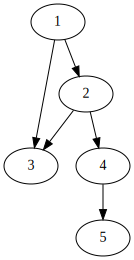

In [8]:
dot_graph(R)

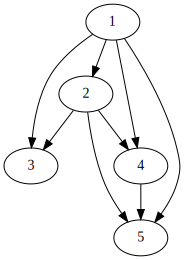

In [9]:
dot_graph(T)